# BTC Price Prediction using LSTM (TensorFlow-Keras)

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pdr.get_data_yahoo("BTC-USD")
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-28,4279.310059,4109.700195,4197.129883,4174.729980,1712320000,4174.729980
2017-09-29,4214.629883,4039.290039,4171.620117,4163.069824,1367049984,4163.069824
2017-09-30,4358.430176,4160.859863,4166.109863,4338.709961,1207449984,4338.709961
2017-10-01,4403.740234,4269.810059,4341.049805,4403.740234,1208210048,4403.740234
2017-10-02,4470.229980,4377.459961,4395.810059,4409.319824,1431730048,4409.319824


### We are looking only Adjusted Close Prices

In [4]:
df_adj = data['Adj Close']

### Training set begins from August 2021

In [6]:
training_set = df_adj.iloc[1400:].to_numpy().reshape(-1,1)
training_set

array([[40008.421875  ],
       [42235.546875  ],
       [41626.1953125 ],
       [39974.89453125],
       [39201.9453125 ],
       [38152.98046875],
       [39747.50390625],
       [40869.5546875 ],
       [42816.5       ],
       [44555.80078125],
       [43798.1171875 ],
       [46365.40234375],
       [45585.03125   ],
       [45593.63671875],
       [44428.2890625 ],
       [47793.3203125 ],
       [47096.9453125 ],
       [47047.00390625],
       [46004.484375  ],
       [44695.359375  ],
       [44801.1875    ],
       [46717.578125  ],
       [49339.17578125],
       [48905.4921875 ],
       [49321.65234375],
       [49546.1484375 ],
       [47706.1171875 ],
       [48960.7890625 ],
       [46942.21875   ],
       [49058.66796875],
       [48902.40234375],
       [48829.83203125],
       [47054.984375  ],
       [47166.6875    ],
       [48847.02734375],
       [49327.72265625],
       [50025.375     ],
       [49944.625     ],
       [51753.41015625],
       [52633.53515625],


### We are rescaling training set with Standard Scaler (Z-score normalization) to make more accurate calculation with TensorFlow
#### It is also possible to use Min Max Scaler for this purpose

In [7]:
from sklearn.preprocessing import StandardScaler #MinMaxScaler

scaler = StandardScaler() # MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[ 0.07426381],
       [ 0.24560546],
       [ 0.1987256 ],
       [ 0.07168442],
       [ 0.01221834],
       [-0.06848273],
       [ 0.05419035],
       [ 0.14051421],
       [ 0.29030051],
       [ 0.42411188],
       [ 0.36582025],
       [ 0.56333178],
       [ 0.5032947 ],
       [ 0.50395676],
       [ 0.41430189],
       [ 0.67318722],
       [ 0.61961231],
       [ 0.61577011],
       [ 0.53556491],
       [ 0.43484868],
       [ 0.44299046],
       [ 0.59042607],
       [ 0.79211607],
       [ 0.75875106],
       [ 0.79076793],
       [ 0.80803931],
       [ 0.66647834],
       [ 0.76300527],
       [ 0.60770857],
       [ 0.77053548],
       [ 0.75851334],
       [ 0.75293022],
       [ 0.61638408],
       [ 0.62497785],
       [ 0.75425312],
       [ 0.79123494],
       [ 0.84490813],
       [ 0.83869571],
       [ 0.97785279],
       [ 1.04556433],
       [ 0.5976233 ],
       [ 0.54225096],
       [ 0.56533356],
       [ 0.44935465],
       [ 0.4737848 ],
       [ 0

### Creating dependent variable x (time) and independent variable y (Price) and checking they have the same dimensionality

In [9]:
x = np.linspace(1,len(training_set),len(training_set)).reshape(-1,1)
y = scaled_training_set
len(x), len(y)

(426, 426)

### Creating four layers of neural networks with 50 neurons each

In [8]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [10]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[0],x.shape[1])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

### Fitting x,y with TensorFlow with mean squared error loss

In [11]:
regressor.compile(optimizer = 'Adam', loss = 'mean_squared_error')
regressor.fit(x, y, epochs=100, batch_size=42)

Epoch 1/100
11/11 [==============================] - 4s 4ms/step - loss: 0.9990
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.9951
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.9857
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.9559
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.8672
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6302
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.3652
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2856
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2895
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2753
Epoch 11/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2737
Epoch 12/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2880
Epoch 13/100
11/11 [=================

11/11 [==============================] - 0s 3ms/step - loss: 0.1803
Epoch 95/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1787
Epoch 96/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1677
Epoch 97/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1870
Epoch 98/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1816
Epoch 99/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1761
Epoch 100/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1784


### Creating new x (x_test) with longer time period and making prediction of Price with the model 
#### Rescale the prediction into $ at the end

In [12]:
x_test  = np.linspace(1,len(training_set)+90,len(training_set)+90).reshape(-1,1)
predicted_price = regressor.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

17/17 [==============================] - 1s 1ms/step


### Ploting the actual price and prediction price with next three months prediction

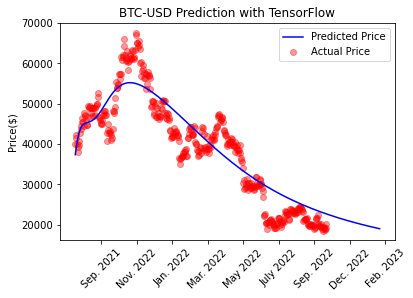

In [13]:
plt.scatter(x,scaler.inverse_transform(y), color = 'red', label = 'Actual Price', alpha = 0.4)
plt.plot(x_test, predicted_price, color = 'blue', label = 'Predicted Price')
plt.xticks([45, 105, 165, 225, 285, 345, 405, 465, 525],['Sep. 2021','Nov. 2022', 'Jan. 2022', 'Mar. 2022', 'May 2022', 'July 2022', 'Sep. 2022', 'Dec. 2022', 'Feb. 2023'])
plt.xticks(rotation=45)
plt.ylabel('Price($)')
plt.title('BTC-USD Prediction with TensorFlow')
plt.legend()
plt.show()